# IN7 - IA pour l'image
## Equipe 11 - Céline NGUYEN, Pierre LEBAS, Thibault VERDIER et Pierre MESTRE
# Récupération du dataset
## Téléchargement
Si la commande gdown n'est pas reconnu, il faut l'installer :
__pip install gdown__ Dataset

In [1]:
!gdown --id 1sQEIPh3bdKQ_1J3g0Z8CRqD6uU7v746l

Downloading...
From: https://drive.google.com/uc?id=1sQEIPh3bdKQ_1J3g0Z8CRqD6uU7v746l
To: /home/v/Documents/Dev/PythonProjects/Notebooks/dataset.zip
100%|████████████████████████████████████████| 236M/236M [00:10<00:00, 21.7MB/s]


## Décompresser le dataset

In [2]:
!unzip -u dataset.zip

Archive:  dataset.zip


In [3]:
import pathlib

data_dir = pathlib.Path("./flowers") # Lecture du dossier flower
image_count = len(list(data_dir.glob('*/*.jpg'))) #compte le nombre de fichier .jpg dans le sous dossier
print(image_count) #affiche le nombre de fichier

4317


# Construction du dataset

In [4]:
## Importation des librairies
import cv2
import numpy as np
import os

dataset = []
count = 0
print("Construction du dataset")
for label in os.listdir("./flowers/"): #liste les sous-dossiers (ici des fleurs) dans le dossier flowers
    for filename in os.listdir(os.path.join("./flowers/",label)): #Liste les images dans chacun des sous-dossiers de fleurs (daisy, dandelion, etc...)
        count = count + 1 #compte le nombre de fichers
        # print(str(count) + " ---loading " + filename)
        image = cv2.imread(os.path.join("./flowers/",label,filename)) #renvoie l'image chargé à partir du fichier spécifié
        dataset.append((image, label)) #ajoute la liste des images avec son label associé dans le tableau dataset
print("dataset construit.")

## Mélange le dataset

In [5]:
import random #importe la librairie random
# print(random.sample(dataset, 10)) #Sélectionne 10 éléments alétoirement dans le tableau dataset

In [6]:
# import random
random.shuffle(dataset) #Mélange le dataset

## Affichage de 9 éléments du dataset

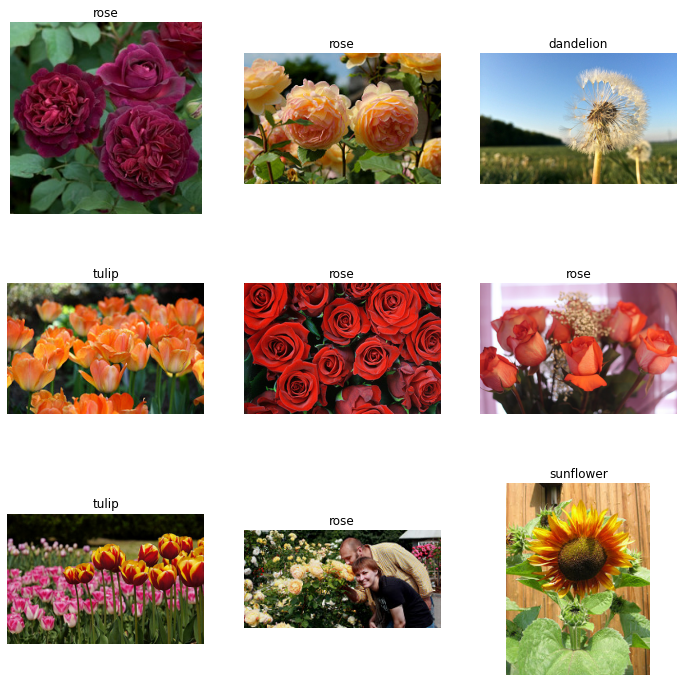

In [7]:
import matplotlib.pyplot as plt

# utilise la librairie matplotlib pour afficher sur une figure de dimension 3x3 les 9 images
fig, axs = plt.subplots(3, 3, figsize = (12, 12)) 
plt.gray() #définit la palette de couleur à gray

for i, ax in enumerate(axs.flat):
    ax.imshow(dataset[i][0][:,:,::-1]) #affiche l'image
    ax.axis('off') #pas d'axe 
    ax.set_title(dataset[i][1]) #affiche le label de l'image
plt.show()

# Construction du modèle
## Pré-traitement
### Redimensionnement

In [8]:
image_size = (32, 32) #définit la taille de l'image à 32x32

In [9]:
import cv2
resized = []
for d in dataset:
    resized.append((cv2.resize(d[0], image_size), d[1])) #pour chaque image du dataset, on redimensionne à la taille 32x32, 
                                                         #et on le store dans la variable temporaire resized

In [10]:
dataset = resized #les images du dataset ont été redimensionné à la taille 32x32

### Transformation en feature

In [11]:
images = np.asarray([d[0] for d in dataset]) #convertis les éléments en tableaux numpy
print(images.shape)  #liste de toutes les images (4317 au total) de dimensions 32x32 sur 3 canaux (3 couleurs/RGB) 
                     #shapes : structure et retourne le format des tableaux

(4317, 32, 32, 3)


In [12]:
images =  np.reshape(images, 
                     (images.shape[0], images.shape[1]*images.shape[2]*images.shape[3]))
#aplati les données des images : on va réduire les dimensions de notre dataset en un tableau 2D
print(images.shape)

(4317, 3072)


In [13]:
# On va attribuer à chacun des labels un numéro de 0 à 4
labels_classes_mapping = {"daisy":0,"dandelion":1,"rose":2,"sunflower":3,"tulip":4}
labels = np.asarray([labels_classes_mapping[d[1]] for d in dataset]) #on obtient la liste des labels de chacun de nos images 
print(labels.shape) #la dimension de notre liste de label est bien égale au nombres d'images que l'on dispose

(4317,)


### Normalisation

In [14]:
#Exemple d'un vecteur d'image non normalisé
print(images[0])

[147 179 125 ...  34  59  30]


In [15]:
images = np.divide(images, 255) #Division par 255 pour normaliser les couleurs RGB entre 0 et 1

In [16]:
#Exemple d'un vecteur d'image après normalisation par 255
print(images[0])

[0.57647059 0.70196078 0.49019608 ... 0.13333333 0.23137255 0.11764706]


### Séparation de la base de test et la base d'entraînement

In [17]:
from sklearn.model_selection import train_test_split #importe la fonction train_test_split de sklearn
(train_x, test_x, train_y, test_y) = train_test_split(images,labels) # on va séparer notre jeu de données en deux sets (training set/testing set)

## Utilisation d'un modèle SVM 

In [18]:
from sklearn.svm import SVC #importe la fonction SVC de sklearn.svm pour réaliser un Support Vector Classification

svc = SVC(kernel='linear') # SVC de type linéaire
svc.fit(train_x, train_y) # entraînement de notre modèle SVM à partir de notre training set 

SVC(kernel='linear')

In [19]:
predicted_y = svc.predict(test_x) # prédiction à partir de notre modèle entraîné sur le jeu de test
predicted_y_train = svc.predict(train_x) # prédiction à partir de notre modèle entraîné sur le jeu de training (pour vérifier)

In [20]:
from sklearn.metrics import accuracy_score 
print("Accuracy on training data is",accuracy_score(train_y, predicted_y_train,)) #affichage du score de précision obtenu sur le jeu de training qui est de 99%
print("Accuracy on unknown data is",accuracy_score(test_y,predicted_y)) #affichage du score de précision obtenu sur le jeu de test "inconnu" qui est de 38%

Accuracy on training data is 0.9990732159406858
Accuracy on unknown data is 0.4148148148148148


Conclusion : le modèle ne prédit pas assez bien (38% seulement) sur un jeu de données inconnu